<a href="https://colab.research.google.com/github/BradleyAgwa/Autolib-Hypothesis-Test/blob/main/Moringa_Data_Science_Core_W4_Independent_Project_2022_1_Bradley_Agwa_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTOLIB CAR SHARING SERVICE HYPOTHESIS TESTING**

# Introduction


Autolib is an electric car sharing service that was started in Paris,France in December 2011.The Autolib had a fleet of electric cars for public use and subscriptions were paid in order to use the cars.The electric are available to anyone above 18 years and has a valid French driving license or an international driving license.

We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

## What is the hypothesis?

**Null hypothesis.**
*Ho*: The number of blue cars taken on the weekends is more than or equal to the number of cars returned on the weekends. Ho: U1 ≥ u2

**Alternative hypothesis.**
*H1*: The number of blue cars taken on the weekends is less than the number of cars returned on the weekends. Ho: U1 < u2

## Defining the metric of success

If the null hypothesis will be upheld




## Experimental Design

- Loading the Datasets and Preparing the Data.

- Data Cleaning 

- Exploratory Data Analysis 

- Hypothesis Testing to Implement the Solution.

- Conclusions and Recommendation.

## Loading the libraries

In [79]:
# Importing Pandas
import pandas as pd

# Importing Numpy
import numpy as np

# Importing Seaborn
import seaborn as sns

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Stats
from scipy import stats

# Importing statsmodels
import statsmodels.api as sm 

# Importing pylab 
import pylab as py

# Importing math
import math as m

# Importing the Norm
from scipy.stats import norm
%matplotlib inline

## Loading our datasets

In [28]:
# Loading the datasets

autolib_df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

# The one below is a secondary of the first to be used later.
autolib_dfb = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
# Data description

description = pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')

# Data Preparation and Exploration

In [29]:
# Checking the description features in the dataset.

description = pd.read_excel("http://bit.ly/DSCoreAutolibDatasetGlossary")
description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [30]:
# Checking the first five rows.
autolib_df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [31]:
# Checking the shape of the dataset.

autolib_df.shape

(16085, 13)

* There are 16085 rows and 13 columns


In [32]:
# Checking the last five rows.

autolib_df.tail(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [33]:
# Checking the data types.

autolib_df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [34]:
# Changing the date data type from object to datetime

autolib_df["date"] = pd.to_datetime(autolib_df["date"])
autolib_df.head()
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

In [35]:
# Checking for any missing values.

autolib_df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

* There are no null values.

In [36]:
# Checking for any duplicates.

autolib_df.duplicated().sum()

0

* There are no duplicated values.

In [37]:
# Checking statistical information.

autolib_df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


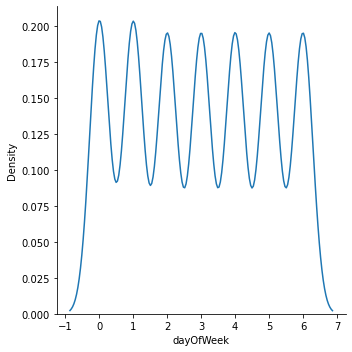

In [38]:
# Distribution plot for the day of the week

sns.displot(autolib_df['dayOfWeek'], kind="kde");


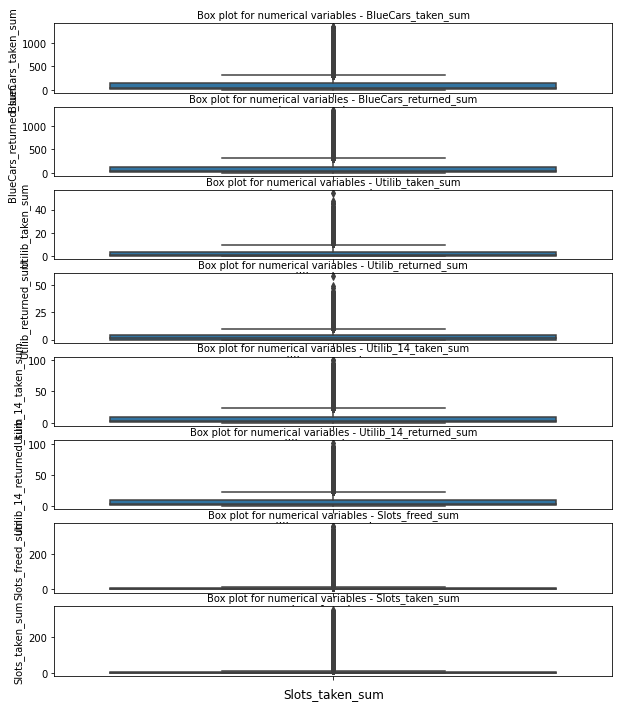

In [39]:
# Checking for anomalies.

numerical_columns = ['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']

fig, ax = plt.subplots(len(numerical_columns), figsize=(10,12))

for i, col_val in enumerate(numerical_columns):

    sns.boxplot(y=autolib_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

From the box plots we can notice that we have many outliers. This can mean these are actual representations of things on the ground.

# Exploratory Data Analysis

## Univariate Analysis

### Measures of Central Tendancy

In [40]:
# Checking data descriptive statistics

autolib_df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [41]:
# The Mean of autolib cars
# In order to execute this,columns for calculation of Central Tendency shall be retained and only and drop the rest
autolib_df.drop(['Postal code', 'date', 'dayOfWeek', 'day_type' ], axis=1, inplace=True)


In [42]:
autolib_df.head(2)

,n_daily_data_points,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,1440,110,103,3,2,10,9,22,20
1,1438,98,94,1,1,8,8,23,22


In [43]:
# Executing the mean

for (columnName, columnData) in autolib_df.iteritems():
  print('\nColumn Name: ', columnName)
  print(f'Mean of {columnName} =: ', columnData.mean())


Column Name:  n_daily_data_points
Mean of n_daily_data_points =:  1431.3306185887473

Column Name:  BlueCars_taken_sum
Mean of BlueCars_taken_sum =:  125.92695057506994

Column Name:  BlueCars_returned_sum
Mean of BlueCars_returned_sum =:  125.912713708424

Column Name:  Utilib_taken_sum
Mean of Utilib_taken_sum =:  3.69829033260802

Column Name:  Utilib_returned_sum
Mean of Utilib_returned_sum =:  3.6990985390115014

Column Name:  Utilib_14_taken_sum
Mean of Utilib_14_taken_sum =:  8.600559527510102

Column Name:  Utilib_14_returned_sum
Mean of Utilib_14_returned_sum =:  8.599191793596518

Column Name:  Slots_freed_sum
Mean of Slots_freed_sum =:  22.62903326080199

Column Name:  Slots_taken_sum
Mean of Slots_taken_sum =:  22.629281939695367


In [44]:
# Median of autolib cars

for (columnName, columnData) in autolib_df.iteritems():
  print('\nColumn Name: ', columnName)
  print(f'Median {columnName} =: ', columnData.median())


Column Name:  n_daily_data_points
Median n_daily_data_points =:  1440.0

Column Name:  BlueCars_taken_sum
Median BlueCars_taken_sum =:  46.0

Column Name:  BlueCars_returned_sum
Median BlueCars_returned_sum =:  46.0

Column Name:  Utilib_taken_sum
Median Utilib_taken_sum =:  1.0

Column Name:  Utilib_returned_sum
Median Utilib_returned_sum =:  1.0

Column Name:  Utilib_14_taken_sum
Median Utilib_14_taken_sum =:  3.0

Column Name:  Utilib_14_returned_sum
Median Utilib_14_returned_sum =:  3.0

Column Name:  Slots_freed_sum
Median Slots_freed_sum =:  0.0

Column Name:  Slots_taken_sum
Median Slots_taken_sum =:  0.0


In [45]:
# Interquantile range

for (columnName, columnData) in autolib_df.iteritems():
  print('\nColumn Name: ', columnName)
  print(f'Quantiles of {columnName} =:\n',columnData.quantile([0.25,0.5,0.75]))


Column Name:  n_daily_data_points
Quantiles of n_daily_data_points =:
 0.25    1439.0
0.50    1440.0
0.75    1440.0
Name: n_daily_data_points, dtype: float64

Column Name:  BlueCars_taken_sum
Quantiles of BlueCars_taken_sum =:
 0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_taken_sum, dtype: float64

Column Name:  BlueCars_returned_sum
Quantiles of BlueCars_returned_sum =:
 0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_returned_sum, dtype: float64

Column Name:  Utilib_taken_sum
Quantiles of Utilib_taken_sum =:
 0.25    0.0
0.50    1.0
0.75    4.0
Name: Utilib_taken_sum, dtype: float64

Column Name:  Utilib_returned_sum
Quantiles of Utilib_returned_sum =:
 0.25    0.0
0.50    1.0
0.75    4.0
Name: Utilib_returned_sum, dtype: float64

Column Name:  Utilib_14_taken_sum
Quantiles of Utilib_14_taken_sum =:
 0.25     1.0
0.50     3.0
0.75    10.0
Name: Utilib_14_taken_sum, dtype: float64

Column Name:  Utilib_14_returned_sum
Quantiles of Utilib_14_returned_sum =:
 0.25

In [46]:
# Standard deviation, Variance, Skewness and Kurtosis

for column in numerical_columns:
  print('\n')
  print(column + ', Standard deviation: '+ str(autolib_df[column].std()))
  print(column + ', Variance: '+ str(autolib_df[column].var()))
  print(column + ', Skewness: '+ str(autolib_df[column].skew()))
  print(column + ', Kurtosis: '+ str(autolib_df[column].kurt()))



BlueCars_taken_sum, Standard deviation: 185.42657876727893
BlueCars_taken_sum, Variance: 34383.01611333789
BlueCars_taken_sum, Skewness: 2.4063548974959086
BlueCars_taken_sum, Kurtosis: 6.172692305510042


BlueCars_returned_sum, Standard deviation: 185.50153480148427
BlueCars_returned_sum, Variance: 34410.819413706275
BlueCars_returned_sum, Skewness: 2.412084978838923
BlueCars_returned_sum, Kurtosis: 6.1862880957582345


Utilib_taken_sum, Standard deviation: 5.815057779367249
Utilib_taken_sum, Variance: 33.81489697737956
Utilib_taken_sum, Skewness: 2.5568719194754777
Utilib_taken_sum, Kurtosis: 7.702361895243428


Utilib_returned_sum, Standard deviation: 5.824634228651658
Utilib_returned_sum, Variance: 33.9263638975805
Utilib_returned_sum, Skewness: 2.57866477971619
Utilib_returned_sum, Kurtosis: 7.93635700780893


Utilib_14_taken_sum, Standard deviation: 12.870098297095637
Utilib_14_taken_sum, Variance: 165.63943017690403
Utilib_14_taken_sum, Skewness: 2.5109244534822923
Utilib_14_t

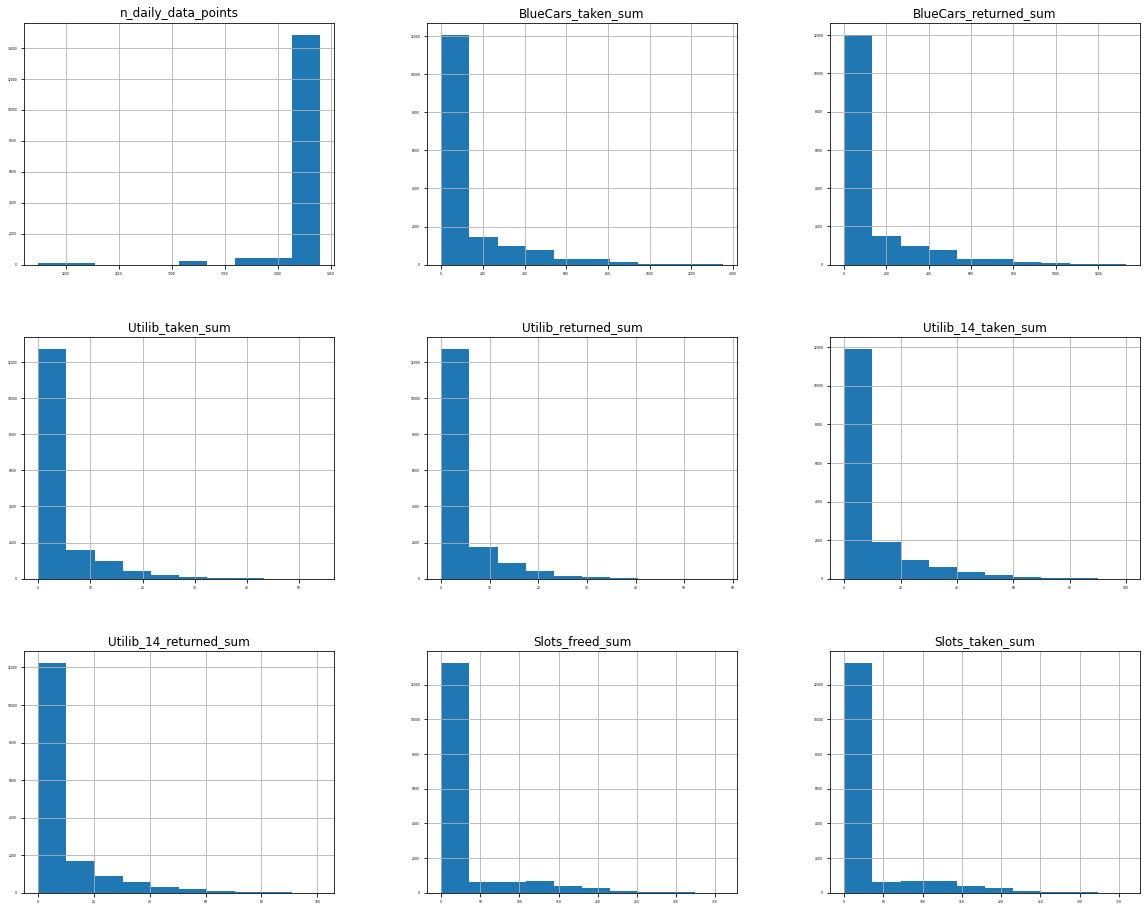

In [47]:
# Plottitng histograms

autolib_df.hist(figsize=(20,16), sharex=False, sharey=False, xlabelsize=3, ylabelsize=3)
plt.show()

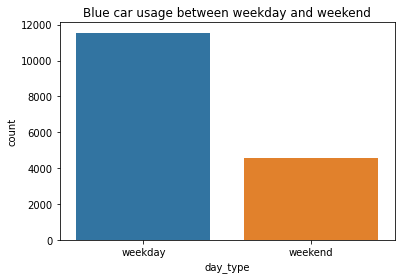

In [48]:
# Comparing the weekday and weekend data

sns.countplot(x='day_type', data=autolib_dfb)
plt.title('Blue car usage between weekday and weekend');

Weekday count of blue car usage is more than those of the weekends

Text(0.5, 1.0, 'Blue car usage on Weekdays')

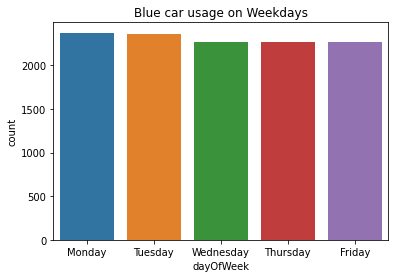

In [49]:
# Blue car popularity during the specific weekdays
#

autolib_dfb['dayOfWeek'] = autolib_dfb.dayOfWeek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
                                    3: 'Thursday', 4: 'Friday'})

# Plot of blue car used on weekdays

sns.countplot(x='dayOfWeek', data=autolib_dfb)
plt.title('Blue car usage on Weekdays')

Monday and Tuesday were the most popular days, the other three are pretty similar.

# Bivariate Analysis


In [50]:
# Plotting the correlations for the columns in the numerical dataframe(autolib_df);
x = autolib_df.corr()
x

,n_daily_data_points,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
n_daily_data_points,1.000000,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
BlueCars_taken_sum,0.029411,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BlueCars_returned_sum,0.030063,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_taken_sum,0.022669,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,0.023322,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib_14_taken_sum,0.025738,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib_14_returned_sum,0.026351,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slots_freed_sum,0.020873,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221
Slots_taken_sum,0.021169,0.947996,0.948771,0.853049,0.852936,0.898719,0.899777,0.999221,1.000000


- Most of the variables have a strong positive correlation. 
- Variables with the highest correlation being between the slots freed sum and that of the slots taken sum. 
- The postal code has a minimal correlation with most of the correlations with the the other variables being negative. 


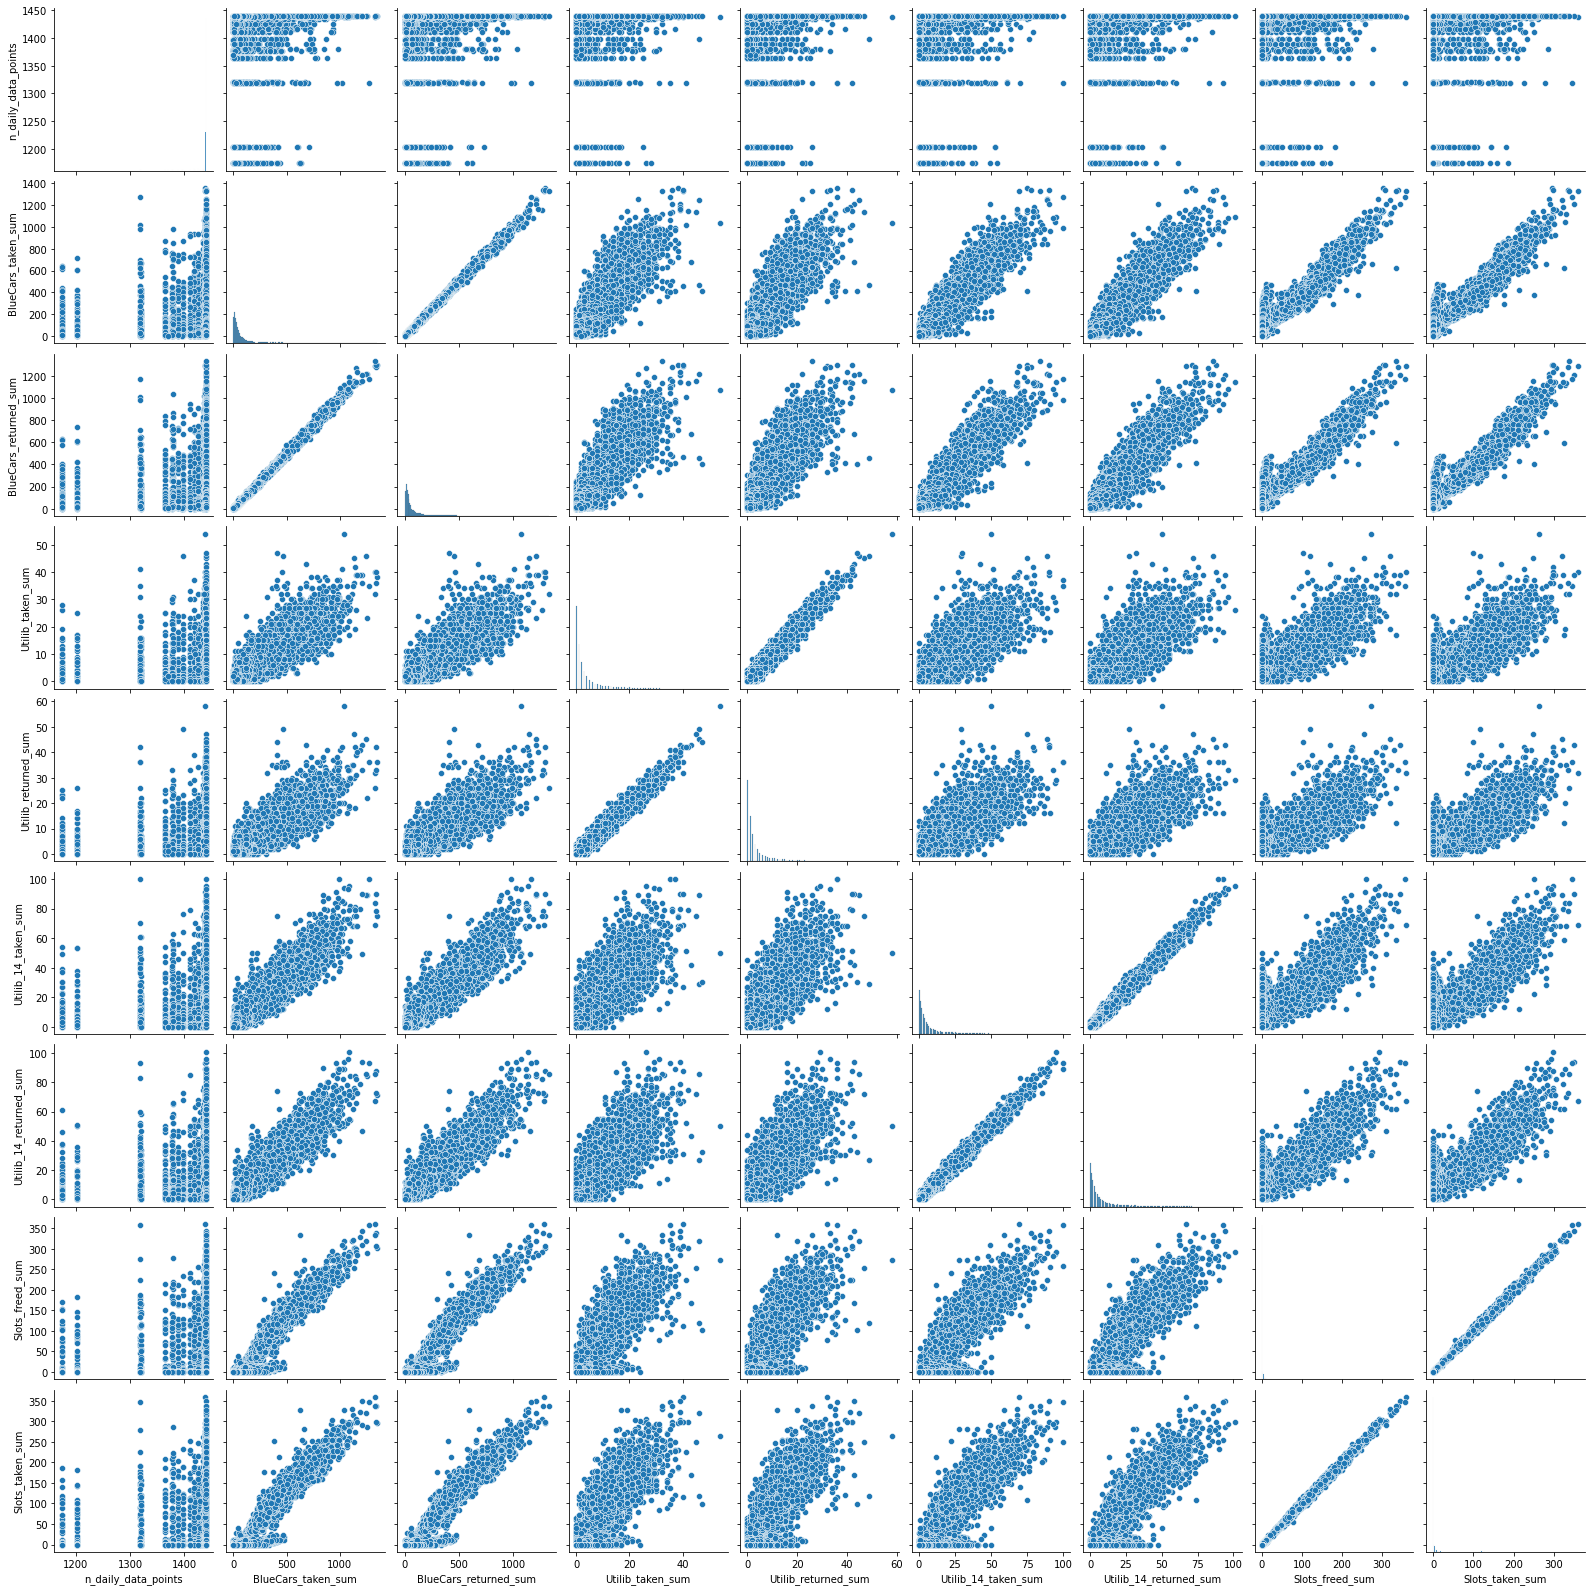

In [51]:
# Ploting the bivariate summaries.

sns.pairplot(autolib_df)
plt.show()

A positive linear correlation is noticed.

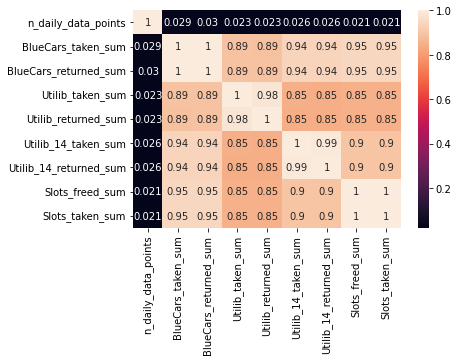

In [53]:
# A heatmap visualization for the correlation
corelation = autolib_df.corr()

sns.heatmap(corelation,xticklabels = corelation.columns, yticklabels = corelation.columns, annot=True);

# HYPOTHESIS TESTING

- Ho: The mean number of blue cars taken on the weekends from different postal codes is equal. Ho: U1 = U2.

- H1: The mean number of blue cars taken on the weekends from different postal codes is not equal. H1: U1 ≠ U2

In [57]:
# Checking data for the blue cars taken over the weekend

autolib_dfh=autolib_dfb[(autolib_dfb['day_type']=='weekend') & (autolib_dfb['BlueCars_taken_sum']!=0)]
autolib_dfh.info

<bound method DataFrame.info of        Postal code       date  ...  Slots_freed_sum Slots_taken_sum
5            75001   1/6/2018  ...               38              35
6            75001   1/7/2018  ...               34              34
12           75001  1/13/2018  ...               38              38
13           75001  1/14/2018  ...               22              20
19           75001  1/20/2018  ...               41              39
...            ...        ...  ...              ...             ...
16068        95880   6/3/2018  ...                0               0
16074        95880   6/9/2018  ...                0               0
16075        95880  6/10/2018  ...                0               0
16081        95880  6/16/2018  ...                0               0
16082        95880  6/17/2018  ...                0               0

[4520 rows x 13 columns]>

In [58]:
# Choosing a sample from our dataset with Random sampling to select our sample

sample_a = autolib_dfh.sample(n=2000, replace = "True", random_state=1)
sample_a.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
838,75006,3/3/2018,1440,NaN,weekend,315,321,3,3,23,21,71,74
14172,94160,4/28/2018,1440,NaN,weekend,90,86,2,2,11,9,5,4
3214,75112,4/8/2018,1440,NaN,weekend,12,12,1,1,0,0,1,1
9858,92800,2/17/2018,1440,NaN,weekend,98,95,1,1,6,7,5,5
10326,93130,2/17/2018,1440,NaN,weekend,35,29,0,1,0,0,0,0


In [60]:
# Picking two postal codes using simple random sampling for comparison

sample_b = sample_a.sample(n=2, replace="False", random_state=1)
sample_b.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
12585,93600,3/31/2018,1440,NaN,weekend,16,15,0,0,0,1,0,0
2135,75014,4/21/2018,1440,NaN,weekend,610,635,18,16,41,43,155,160


In [68]:
# Creating a dataset with only the 93600 postal code

sample_c = autolib_df = autolib_dfh[autolib_dfh['Postal code'] == 93600]
sample_c.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
12504,93600,1/6/2018,1437,NaN,weekend,24,34,0,0,1,1,0,0
12505,93600,1/7/2018,1440,NaN,weekend,26,13,0,0,1,1,0,0
12511,93600,1/13/2018,1440,NaN,weekend,18,24,0,0,4,3,0,0
12512,93600,1/14/2018,1440,NaN,weekend,25,18,0,1,2,1,0,0
12518,93600,1/20/2018,1439,NaN,weekend,27,25,0,1,3,3,0,0


In [69]:
# Creating another dataframe with only the 75014 postal code

sample_d = autolib_df = autolib_dfh[autolib_dfh['Postal code'] == 75014]
sample_d.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
2033,75014,1/6/2018,1437,NaN,weekend,573,582,11,10,45,43,163,169
2034,75014,1/7/2018,1440,NaN,weekend,575,596,12,13,32,37,156,162
2040,75014,1/13/2018,1440,NaN,weekend,677,695,24,23,59,57,171,178
2041,75014,1/14/2018,1440,NaN,weekend,655,654,24,23,54,57,177,170
2047,75014,1/20/2018,1439,NaN,weekend,640,651,19,19,38,38,144,152


## Checking for Normality


Text(0.5, 1.0, '93600 postal code')

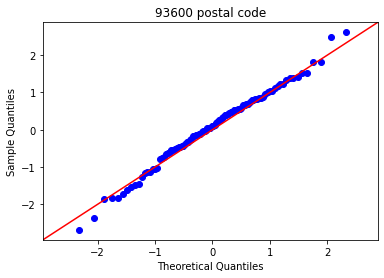

In [77]:
# Checking for normality in the sampled datasets of the 2 postal codes
# Starting with the sample_c

sample_c = np.random.normal(0, 1, 100)     
  
sm.qqplot(sample_c, line ='45') 

py.title('93600 postal code')

Text(0.5, 1.0, 'Q-Q plot for the 75014 postal code')

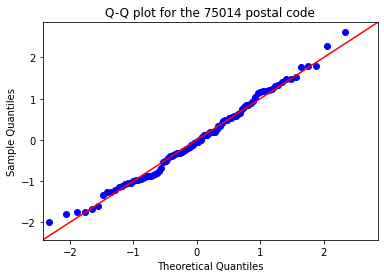

In [78]:
# Now checking for sample_d
sample_d = np.random.normal(0, 1, 100)     
  
sm.qqplot(sample_d, line ='45') 
py.title('Q-Q plot for the 75014 postal code')

In [81]:
# Calculating the z score for calculating the mean of the two samples


# Calculating the mean of the blue cars returned

mean1 = sample_c.mean()
mean2 = sample_d.mean()
# Calculating the mean difference

mean_difference = mean1 - mean2

# Calculating the standard deviation of the two samples

std1 = sample_c.std()
std2 = sample_d.std()
# Calculating the number of rows in each

n1 = sample_c.shape
n2 = sample_d.shape

z_score = (mean1 - mean2)/m.sqrt((std1/n1)+(std2/n2))
z_score

0.4077008099089831

In [82]:
# Calculating the p value

pval = stats.norm.cdf(z_score)
print(pval)

# Using an alpha level of 0.05
if pval < 0.05:
    print("Reject null hypothesis")
else:
    print("Accept the null hypothesis")

0.658253328606125
Accept the null hypothesis


# Hypothesis testing interpretation


After the analysis, the results were that the P-Value is more than the significance level i.e., 0.5 < 0.658. In this case we accepted the null hypothesis and concluded that: On the weekends, the number of blue cars taken in two different postal codes is more or less the same